In [1]:
from textblob import TextBlob
from googletrans import Translator

In [2]:
TextBlob('Amo este libro, es el mejor').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [3]:
TextBlob('I love this book, is the best').sentiment 

Sentiment(polarity=0.75, subjectivity=0.44999999999999996)

In [5]:
# Crear un objeto Translator
translator = Translator()

# Texto en español que queremos analizar
texto = "La trama era predecible y el final fue decepcionante"

# Traducir el texto al inglés
texto_ingles = translator.translate(texto, src='es', dest='en').text

# Crear un objeto TextBlob con el texto traducido
blob = TextBlob(texto_ingles)

# Imprimir el sentimiento del texto traducido
blob.sentiment


Sentiment(polarity=-0.4, subjectivity=0.6)

Es posible que el resultado del análisis de sentimientos muestre una polaridad y subjetividad de 0.0 si el texto analizado es neutral y objetivo. Aquí tienes una explicación de los valores que devuelve el método `sentiment` de TextBlob:

- Polaridad: Es un valor numérico que indica la positividad o negatividad del texto. Un valor de 0.0 indica neutralidad, valores mayores que 0.0 indican positividad y valores menores que 0.0 indican negatividad.
- Subjetividad: Es un valor numérico que indica la subjetividad del texto, es decir, si el texto es objetivo o subjetivo. Un valor de 0.0 indica objetividad (hechos objetivos) y un valor de 1.0 indica subjetividad total (opiniones personales).

En tu caso, al obtener una polaridad y subjetividad de 0.0, significa que el texto es neutro y objetivo, no contiene opiniones o emociones claramente positivas o negativas. Es importante recordar que estos resultados son solo una representación del análisis de sentimientos y pueden variar dependiendo del contexto y la complejidad del texto analizado. Si consideras que el texto debería tener una polaridad y subjetividad diferentes, podrías revisar el texto nuevamente o utilizar otras técnicas de análisis de sentimientos para obtener resultados más precisos.

In [23]:
import pandas as pd

# Crear un objeto Translator
translator = Translator()

# Lista de comentarios en español
comentarios_espanol = [
    "La trama era predecible y el final fue decepcionante",
    "Me encantó este libro, fue inspirador y emocionante de principio a fin",
    "No puedo esperar para leer más del autor, definitivamente me ha ganado como fan",
    "No conecté con los personajes, me resultaron poco realistas",
    "Fue una montaña rusa emocional, nunca sabía qué esperar a continuación",
    "La escritura era hermosa y poética, cada palabra estaba cuidadosamente elegida",
    "No puedo expresar lo mucho que disfruté este libro, me hizo reír y llorar en igual medida",
    "Este libro superó mis expectativas, definitivamente lo recomendaría a cualquiera que esté buscando una buena lectura",
    "Los personajes secundarios eran tan interesantes como los protagonistas, cada uno tenía su propia historia convincente",
    "No recomendaría este libro a nadie, no vale la pena el tiempo de lectura"
]

# Traducir los comentarios al inglés y obtener su sentimiento
comentarios_ingles = [translator.translate(comment, src='es', dest='en').text for comment in comentarios_espanol]
sentimientos = [TextBlob(comment).sentiment.polarity for comment in comentarios_ingles]

# Clasificar los comentarios según su sentimiento
categorias = []

for s in sentimientos:
    if s < 0:
        categorias.append('Negativo')
    elif s > 0:
        categorias.append('Positivo')
    else:
        categorias.append('Neutral')


# Crear DataFrame
df_comentarios = pd.DataFrame({'Comentario': comentarios_espanol, 'Sentimiento': categorias})

# Mostrar DataFrame
print(df_comentarios)


                                          Comentario Sentimiento
0  La trama era predecible y el final fue decepci...    Negativo
1  Me encantó este libro, fue inspirador y emocio...    Positivo
2  No puedo esperar para leer más del autor, defi...    Positivo
3  No conecté con los personajes, me resultaron p...    Negativo
4  Fue una montaña rusa emocional, nunca sabía qu...     Neutral
5  La escritura era hermosa y poética, cada palab...    Positivo
6  No puedo expresar lo mucho que disfruté este l...    Positivo
7  Este libro superó mis expectativas, definitiva...    Positivo
8  Los personajes secundarios eran tan interesant...    Positivo
9  No recomendaría este libro a nadie, no vale la...    Negativo


In [70]:
df_comentarios.head()

,Comentario,Sentimiento
0,La trama era predecible y el final fue decepci...,Negativo
1,"Me encantó este libro, fue inspirador y emocio...",Positivo
2,"No puedo esperar para leer más del autor, defi...",Positivo
3,"No conecté con los personajes, me resultaron p...",Negativo
4,"Fue una montaña rusa emocional, nunca sabía qu...",Neutral


In [47]:
import matplotlib.pyplot as plt

In [64]:
total_sentimientos = df_comentarios['Sentimiento'].value_counts()/df_comentarios.shape[0]
total_sentimientos

Sentimiento
Positivo    0.6
Negativo    0.3
Neutral     0.1
Name: count, dtype: float64

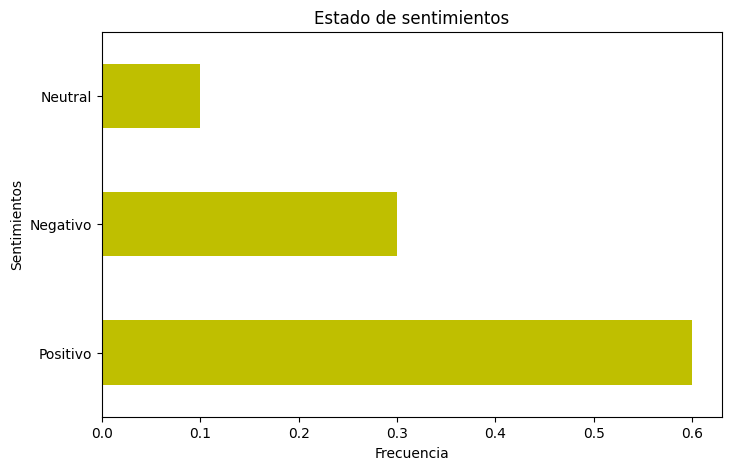

In [69]:

total_sentimientos = df_comentarios['Sentimiento'].value_counts()/df_comentarios.shape[0]

plt.figure(figsize=(8, 5))
total_sentimientos.plot(kind='barh', color = "y")
plt.title("Estado de sentimientos")
plt.xlabel("Frecuencia")
plt.ylabel("Sentimientos")
plt.xticks(rotation=0)
plt.show()

In [43]:
# Calcular el porcentaje de cada sentimiento
porcentaje_sentimientos = df_comentarios['Sentimiento'].value_counts(normalize=True) * 100

# Crear un nuevo DataFrame con los resultados
df_porcentaje = pd.DataFrame({'sentimiento': porcentaje_sentimientos.index, 'Porcentaje': porcentaje_sentimientos.values})

print(df_porcentaje)

  sentimiento  Porcentaje
0    Positivo        60.0
1    Negativo        30.0
2     Neutral        10.0


In [31]:
df_comentarios.groupby('Sentimiento').count()

,Comentario
Sentimiento,
Negativo,3
Neutral,1
Positivo,6


In [36]:
total_filas = df_comentarios.shape[0]
porcentajes = df_comentarios.groupby('Sentimiento').count() / total_filas*100
porcentajes

,Comentario
Sentimiento,
Negativo,30.0
Neutral,10.0
Positivo,60.0
